# Cyptocurrency Clusters

In [1]:
# Import dependencies

import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

### Data Preparation

In [2]:
# Load Crypto data from Local Resources

crypto_df = pd.read_csv('../Resources/crypto_data.csv')
crypto_df.rename(columns={'Unnamed: 0':'StockTicker'}, inplace = True)
crypto_df

,StockTicker,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
# Discard all cryptocurrencies that are not being traded. In other words, filter for currencies that are currently being traded. 

trading_crypto_df = crypto_df[crypto_df['IsTrading'] == True]
trading_crypto_df

,StockTicker,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [4]:
# IsTrading = 1 shows that we are selecting only the currencies that are being traded.

trading_crypto_df.nunique()

StockTicker        1144
CoinName           1137
Algorithm            89
IsTrading             1
ProofType            36
TotalCoinsMined     520
TotalCoinSupply     513
dtype: int64

In [5]:
# Since IsTrading has only one value 'True'.. Dropping the column from trading crypto df

trading_crypto_df.drop(labels = 'IsTrading', axis = 1, inplace=True)
trading_crypto_df

C:\Users\kesam\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,StockTicker,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
# Remove all rows that have at least one null value.

trading_crypto_df.dropna(inplace=True)
trading_crypto_df

C:\Users\kesam\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,StockTicker,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
# Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.

mined_trading_cryptos_df = trading_crypto_df.loc[trading_crypto_df['TotalCoinsMined'] > 0]
mined_trading_cryptos_df

,StockTicker,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [8]:
# For machine learning algorithm, the data should be numeric. Since the stock tickers and coin names do not contribute to the analysis of the data, 
#   deleting these 2 columns from the dataframe.
# Since the Coin names and Stock tickers

mined_trading_cryptos_df.drop(columns = ['StockTicker', 'CoinName'], inplace = True, index = None)
mined_trading_cryptos_df.reset_index(drop=True)

C:\Users\kesam\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
1,Scrypt,PoW/PoS,1.055185e+09,532000000
2,X13,PoW/PoS,2.927942e+10,314159265359
3,SHA-256,PoW,1.792718e+07,21000000
4,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
527,SHA-256,DPoS,2.000000e+09,2000000000
528,Scrypt,PoW/PoS,1.493105e+07,250000000
529,CryptoNight,PoW,9.802226e+08,1400222610
530,Equihash,PoW,7.296538e+06,21000000


In [9]:
# Convert features into numerical data

X = pd.get_dummies(mined_trading_cryptos_df, columns = ['Algorithm', 'ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
#  Using Standard scalar as it provides the normal distribution variance

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [11]:
X_scaled.shape

(532, 98)

## Dimensionality Reduction

#### Dimensionality Reduction using Principal Component Analysis (PCA)

In [12]:
# Principal Component Analysis

from sklearn.decomposition import PCA

# Instead of providing the number of components while instantiating the PCA, by specifying the float number between 0.0 and 1.0. 
# This float value represents the ratio of variance you wish to preserve. Here I am setting the variance to 90%.

pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
        -4.46532550e-15,  5.62343533e-15,  1.49507977e-16],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
        -3.63645692e-15,  5.25359408e-15,  2.25718281e-16],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
         7.75066626e-14, -1.17632711e-13, -5.02829165e-14],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
         4.92696433e-14,  2.74532450e-14,  1.56967958e-15],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
         3.63533220e-15, -4.69781528e-16,  1.17522750e-15],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         1.05646641e-15,  1.05006748e-15,  4.14908459e-15]])

In [13]:
# Reduced dimensions after PCA

X_pca.shape

(532, 74)

Intially there were 98 features based on Algorithm and ProofType along with 'TotalCoinsMined' and 'TotalCoinSupply'. 

After applying the dimensionality reduction technique PCA, the features have reduced to 74. Approx. 24% reduction in features.

In [ ]:
# Ratio indicates the proportion of the dataset's variance that lies along each principal component.

pca.explained_variance_ratio_

In [ ]:
# Even though we can not explicitly provided the number of components in PCA, its calculated to be 74 to preserve 90% of the explained variance.

print(f"\nSum of explained variance: {np.sum(pca.explained_variance_ratio_)}")
print(f"Number of dimentsion required: {pca.n_components_}")

In [ ]:
# Without reducing the dimensionality, to compute number of dimensions required to preserve 90% of variance.

# pca = PCA()
# pca.fit(X_scaled)
# cumsum = np.cumsum(pca.explained_variance_ratio_)
# print('Cumulative sum of explained variance:')
# print('--------------------------------------')
# print(cumsum)
# print('--------------------------------------')
# d=np.argmax(cumsum >= 0.90) + 1
# print(f"Number of required dimensions: {d}")

# plt.figure(figsize=(6,4))
# plt.plot(cumsum, linewidth=3)
# plt.axis([0, 110, 0, 1.1])
# plt.xlabel("Dimensions")
# plt.ylabel("Explained Variance")
# plt.plot([d, d], [0, 0.90], "k:")
# plt.plot([0, d], [0.90, 0.90], "k:")
# plt.plot(d, 0.90, "ko")
# # plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
# #              arrowprops=dict(arrowstyle="->"), fontsize=16)
# plt.grid(True)
# plt.show()

#### Dimensionality Reduction using t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [15]:
# t-Distributed Stochastic Neighbor Embedding

from sklearn.manifold import TSNE

tsne = TSNE(learning_rate=10, perplexity = 50)
transformed_features = tsne.fit_transform(X_pca)
transformed_features

array([[ -6.0606627 ,  -6.1609263 ],
       [ -9.223951  ,  -8.240066  ],
       [ -0.04101739, -16.028385  ],
       ...,
       [ -4.4127636 ,  14.746399  ],
       [  5.605698  ,   6.4620943 ],
       [ -0.49930567,  -1.6008275 ]], dtype=float32)

In [16]:
# Reduced dimensions after t-SNE

transformed_features.shape

(532, 2)

When t-SNE Technique is applied on the PCA data, the features have drastically reduced to only 2.

In [17]:
# Loading features into the dataframe

X['x'] = transformed_features[:,0]
X['y'] = transformed_features[:,1]

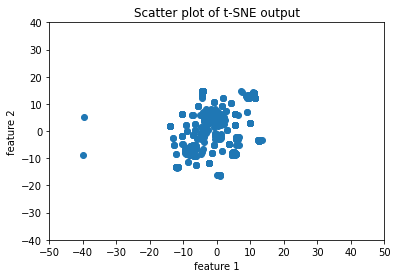

In [18]:
# Plot the feature output of the t-SNE reduction technique

plt.scatter(X['x'], X['y'])
plt.xticks(range(-50,60,10))
plt.yticks(range(-40,50,10))
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Scatter plot of t-SNE output')
plt.show()

### Cluster Analysis with k-Means

In [19]:
# Finding the best value for _k_ using the Elbow Curve

inertia = []
k = list(range(1, 11))

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

C:\Users\kesam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,46979.075160
1,2,45909.857193
2,3,44845.490039
3,4,43778.700400
4,5,42518.641991
5,6,42110.072833
6,7,41512.802544
7,8,40100.342804
8,9,39210.120754
9,10,38316.717176


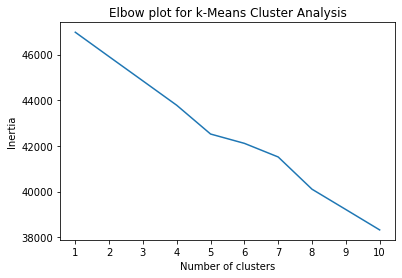

In [20]:
# Elbow curve to identify the best number of clusters

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(k)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow plot for k-Means Cluster Analysis')
plt.show()

## Analysis suggests there are no meaning cluster groups for this crypto data.